In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools


from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
#!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [12]:
df = pd.read_csv("../Data/airline_passengers.csv",
                 index_col = 'Month',
                 parse_dates = True)
df.head()
df.index.freq = 'MS'


<Axes: xlabel='Month'>

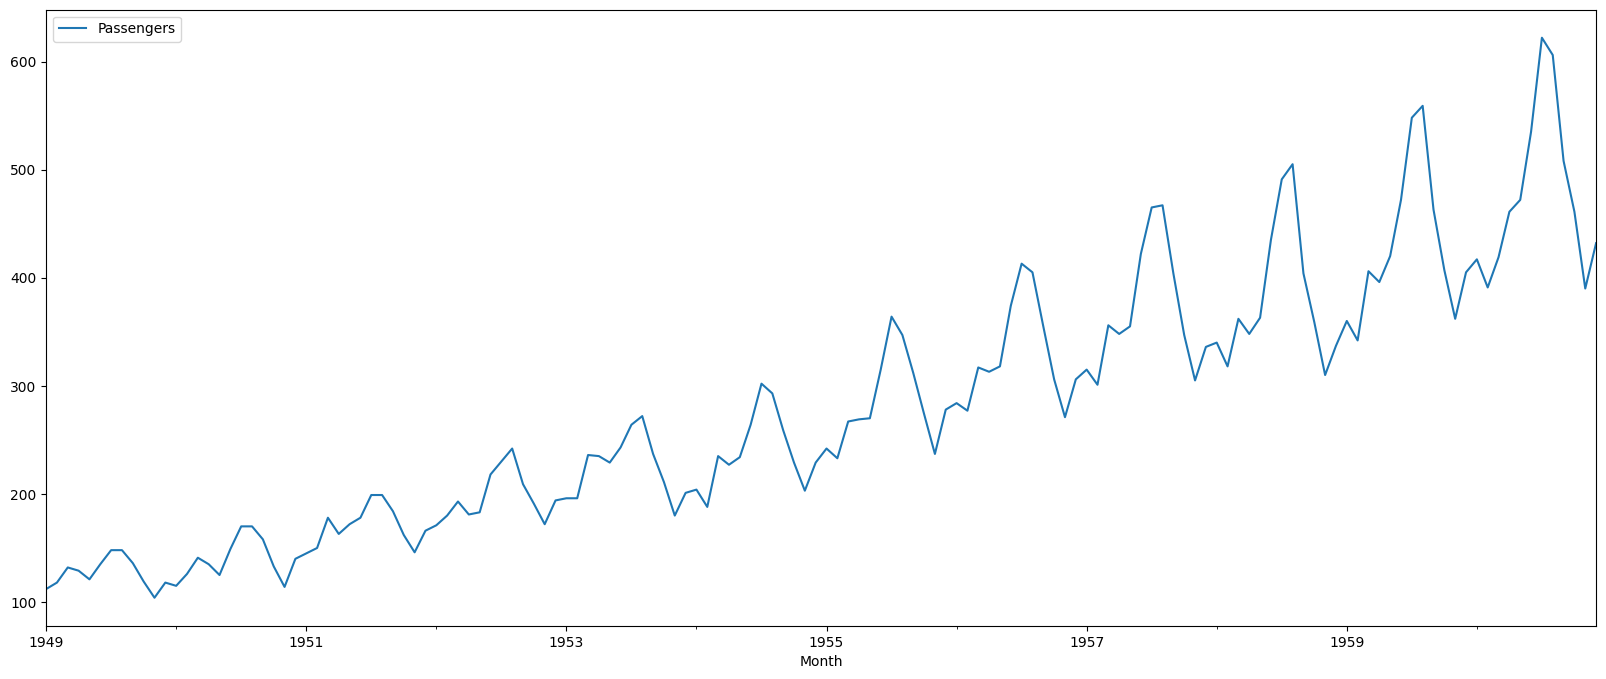

In [13]:
df.plot(figsize=(20,8))

<Axes: xlabel='Month'>

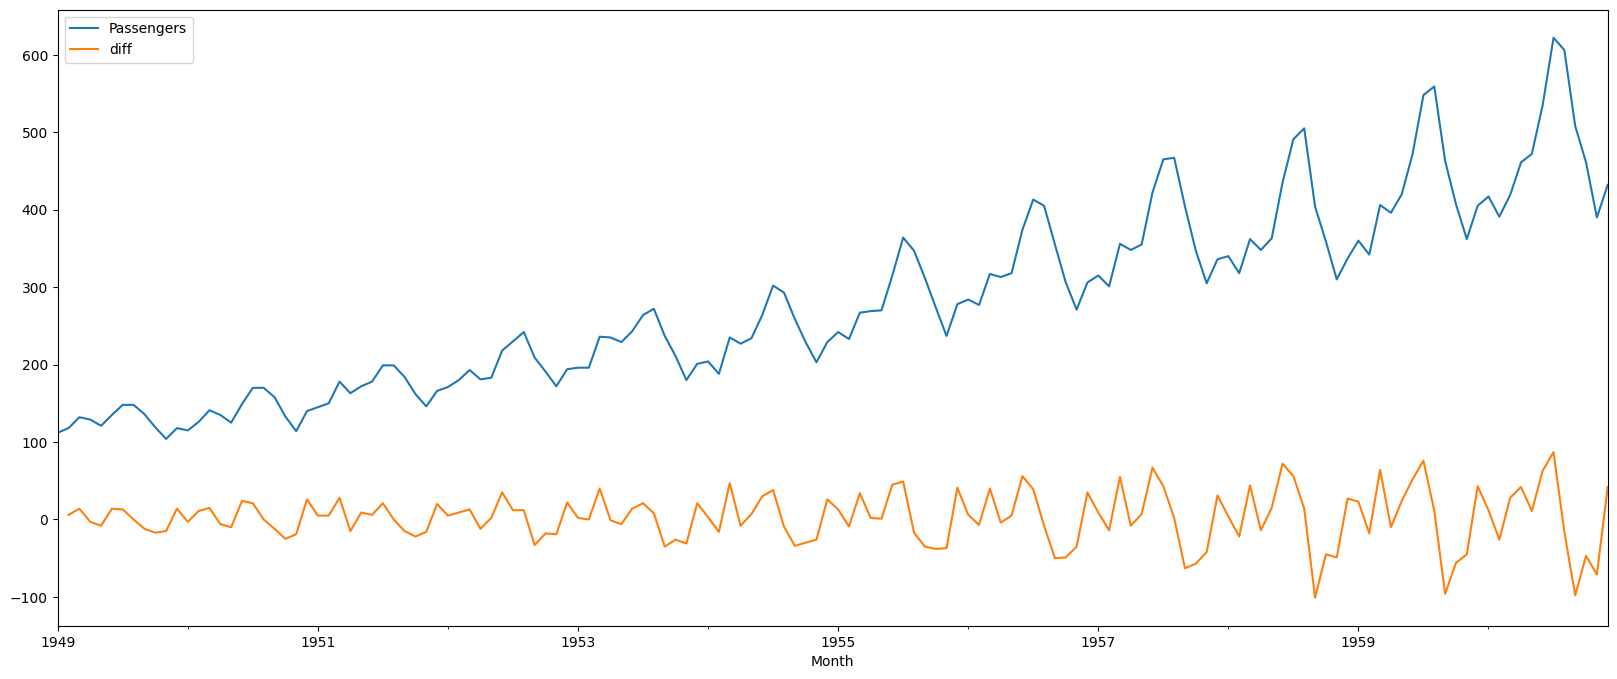

In [14]:
df['diff'] = df['Passengers'].diff()
df.plot(figsize=(20,8)) # Variance is increasing

<Axes: xlabel='Month'>

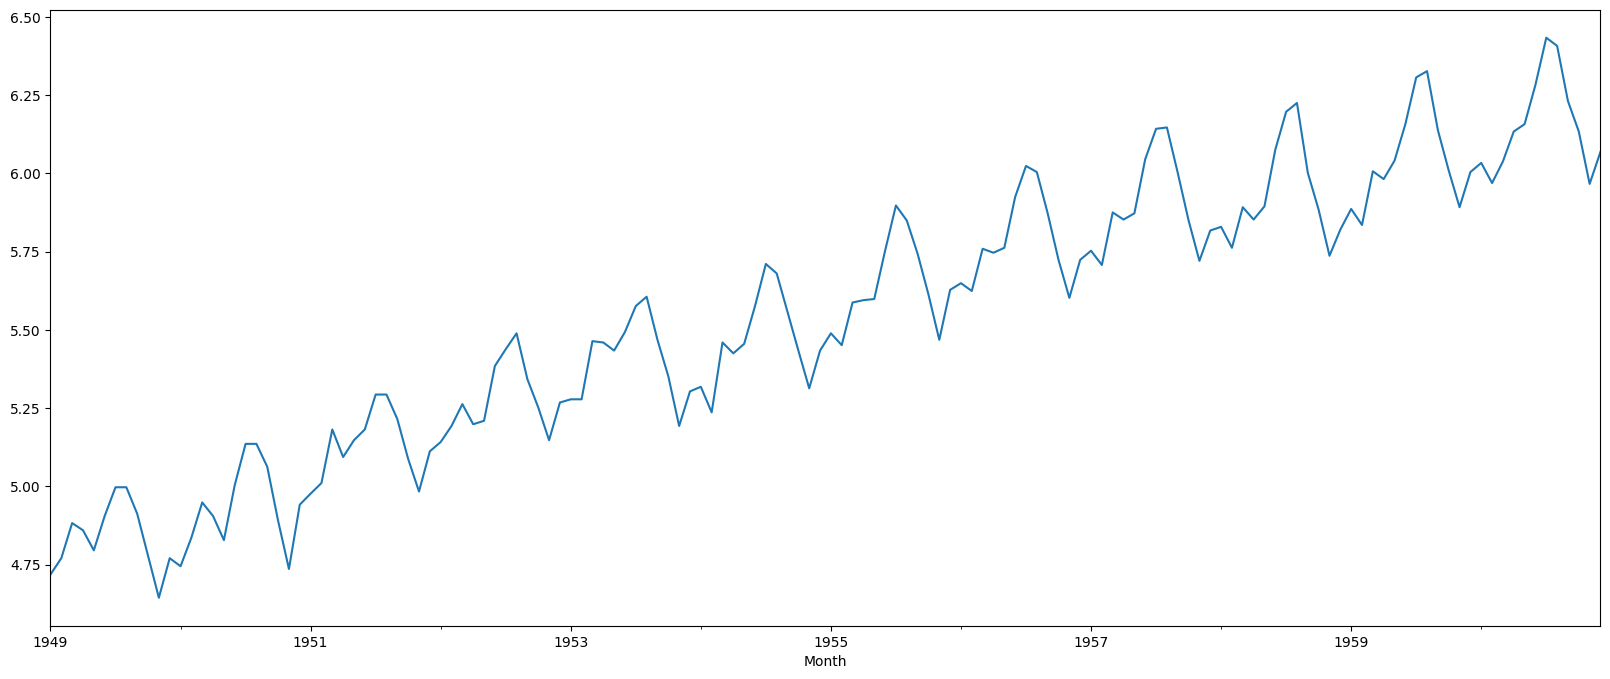

In [15]:
df['LogPassengers'] = np.log(df['Passengers'])
df['LogPassengers'].plot(figsize=(20,8)) # Variance seems more constant

In [16]:
from statsmodels.tsa.arima.model import ARIMA

<Axes: xlabel='Month'>

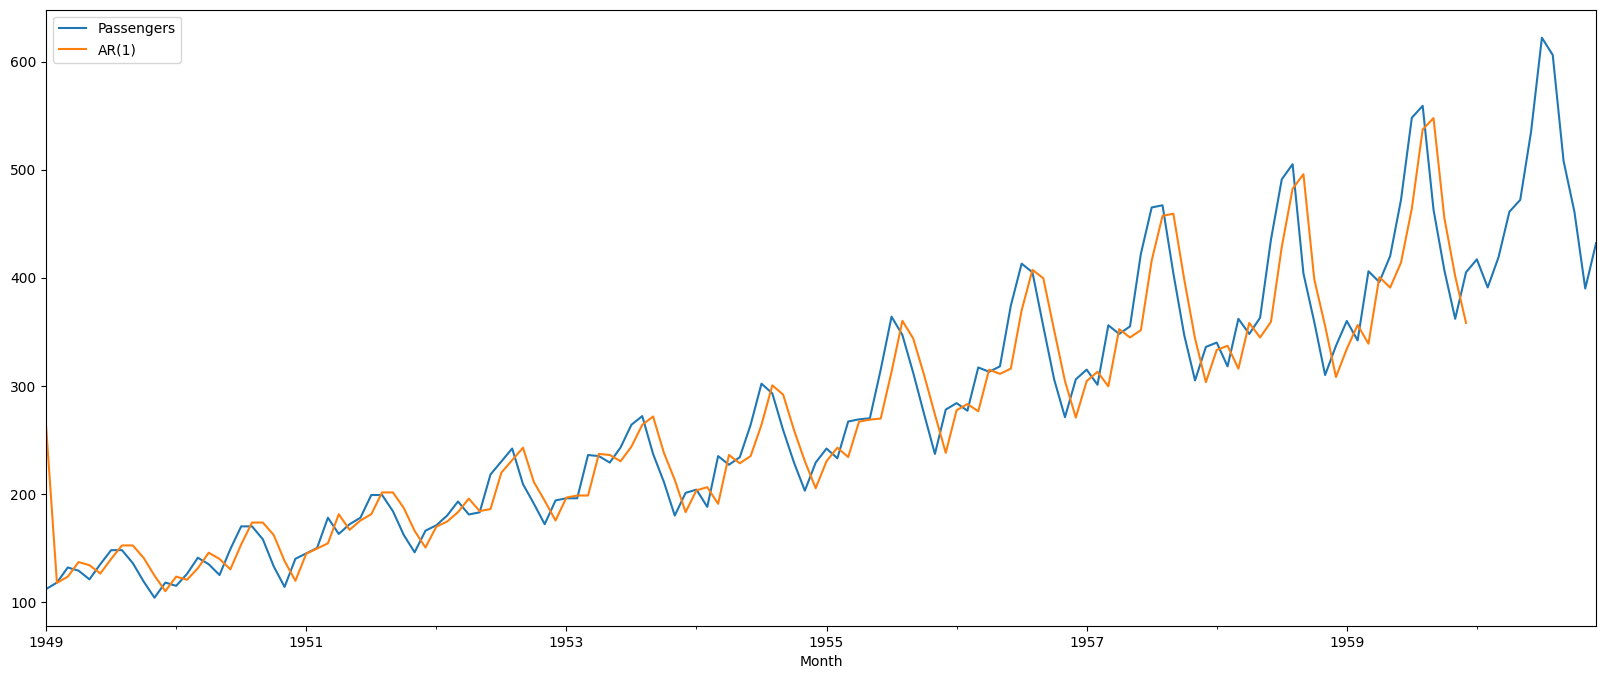

In [22]:
# Split train and test
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

# Instantiate arima model
arima = ARIMA(train['Passengers'], order = (1,0,0))
arima_result = arima.fit()

# add training prediction
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start = train.index[0], end = train.index[-1])

# plot
df[['Passengers', 'AR(1)']].plot(figsize = (20, 8))

<Axes: xlabel='Month'>

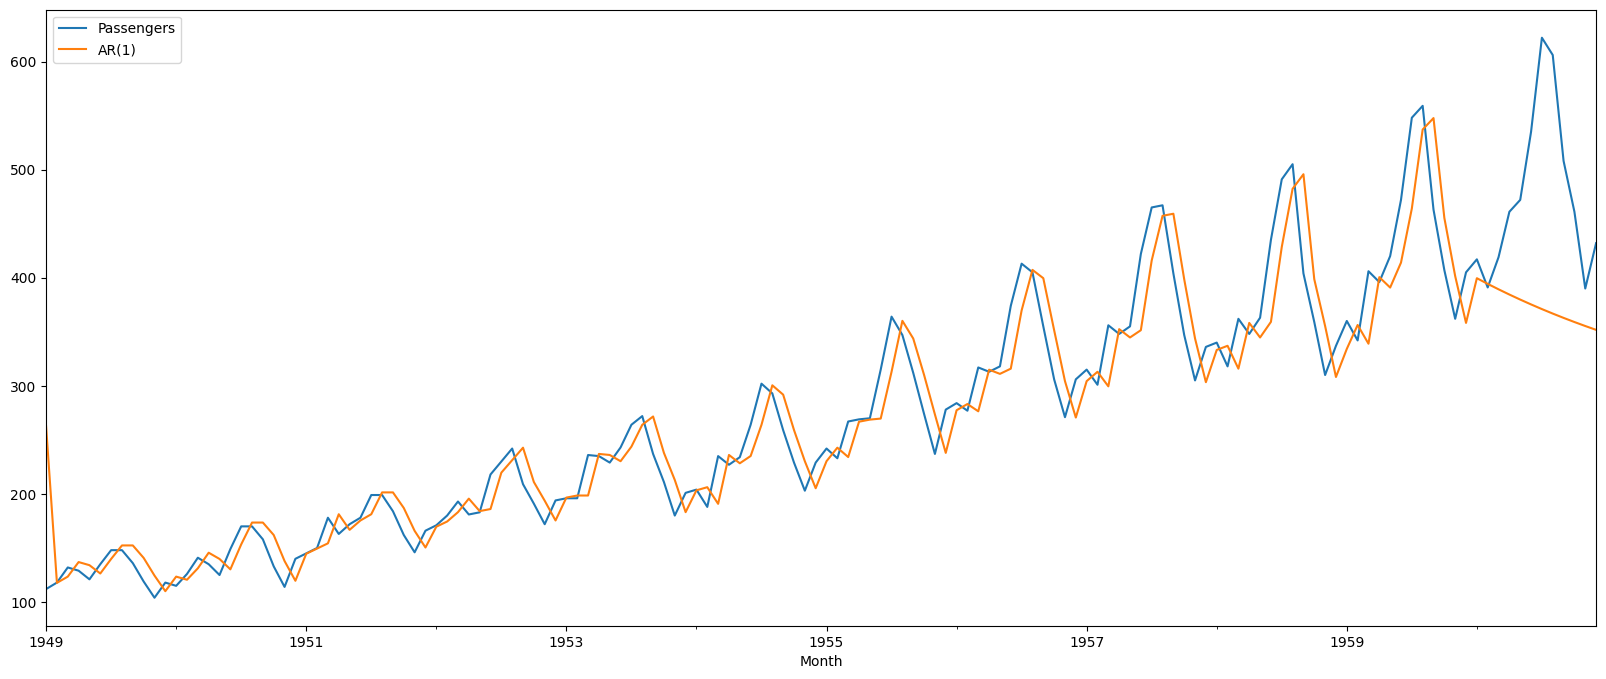

In [23]:
# Add arima forecast
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

# plot
df[['Passengers', 'AR(1)']].plot(figsize = (20, 8))  # the model seems pretty bad (worst than naive)

In [24]:
# get confidence interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829380
1960-04-01,269.338255,499.534230
1960-05-01,253.432283,506.121348
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201639
1960-08-01,215.354569,518.324977
1960-09-01,204.941150,520.764225
1960-10-01,195.386337,522.649550


In [28]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(df['Passengers'], label = 'data')
    
    # plot the curve fitted on train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color = 'green', label = 'fitted')
    
    # forecast the tes set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label = 'forecast')
    # plot confidenct bound
    ax.fill_between(test.index, \
                   lower, upper, \
                   color = 'red', alpha = 0.3)
    ax.legend()
    
    

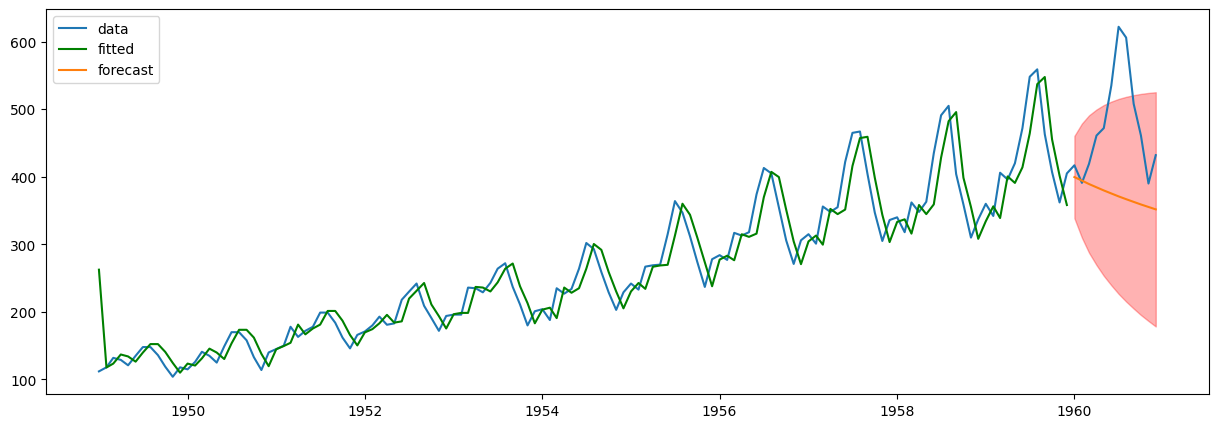

In [29]:
plot_fit_and_forecast(arima_result)

/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


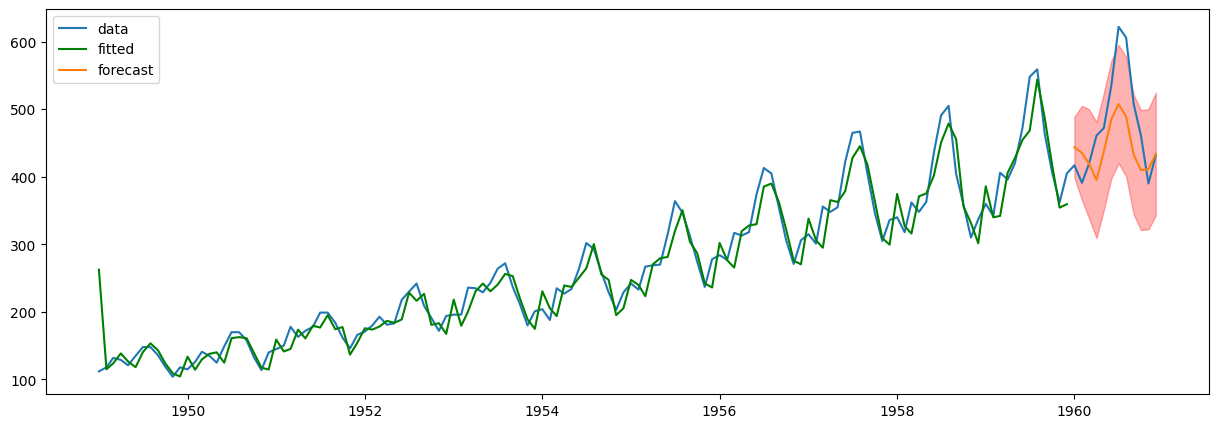

In [30]:
arima = ARIMA(train['Passengers'], order = (10, 0, 0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


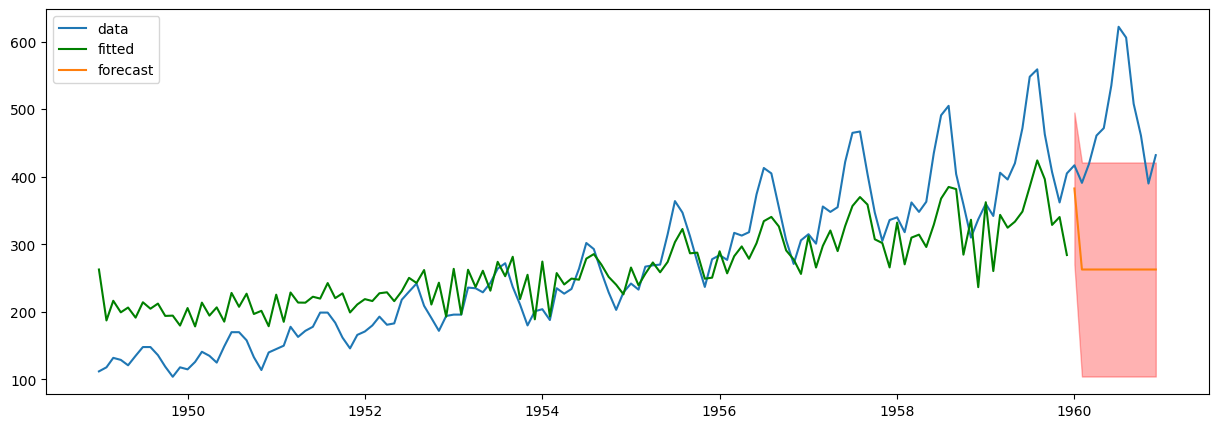

In [31]:
arima = ARIMA(train['Passengers'], order = (0, 0, 1))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

<Axes: xlabel='Month'>

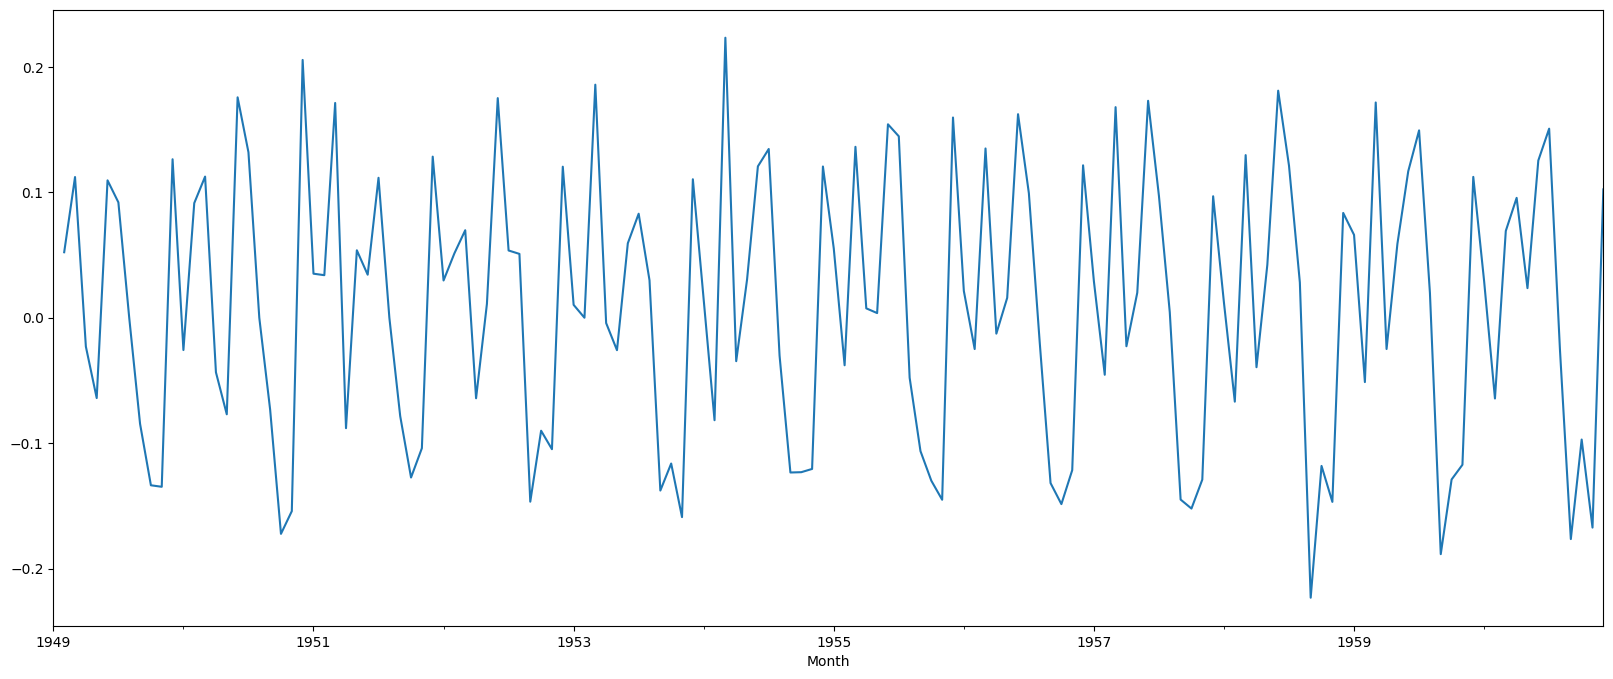

In [34]:
df['Log1stDiff'] = df['LogPassengers'].diff()
df['Log1stDiff'].plot(figsize = (20,8))

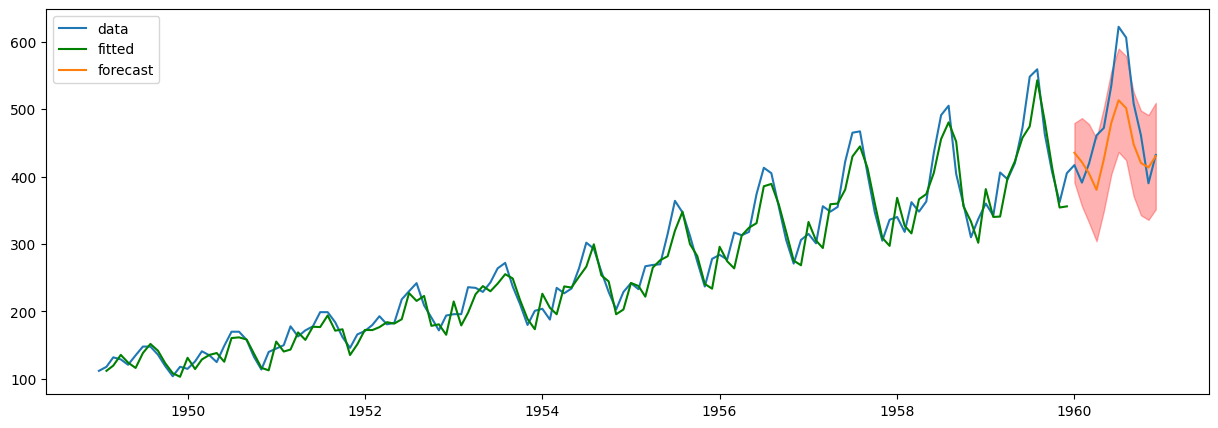

In [42]:
def plot_fit_and_forecast_int(result, d, col = 'Passengers'):
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(df[col], label = 'data')
    
    # plot the curve fitted on train set
    train_pred = result.predict(start = train.index[d], end = train.index[-1])
    ax.plot(train.index[d:], train_pred, color = 'green', label = 'fitted')
    
    # forecast the tes set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label = 'forecast')
    # plot confidenct bound
    ax.fill_between(test.index, \
                   lower, upper, \
                   color = 'red', alpha = 0.3)
    ax.legend()
    
    
arima_811 = ARIMA(train['Passengers'], order = (8, 1, 1))
arima_result_811 = arima_811.fit()
plot_fit_and_forecast_int(arima_result_811, 1)

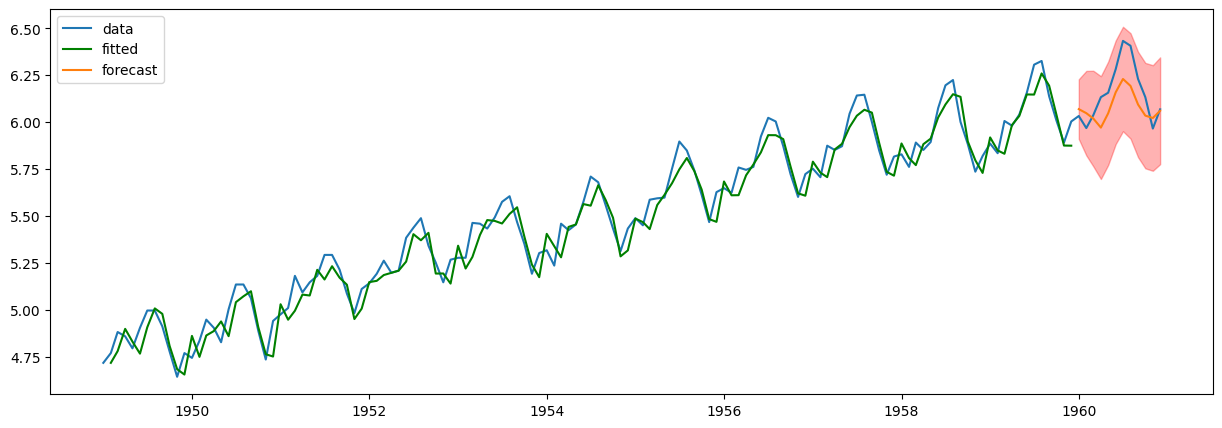

In [43]:
arima_log811 = ARIMA(train['LogPassengers'], order = (8, 1, 1))
arima_result_log811 = arima_log811.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, 'LogPassengers')

/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


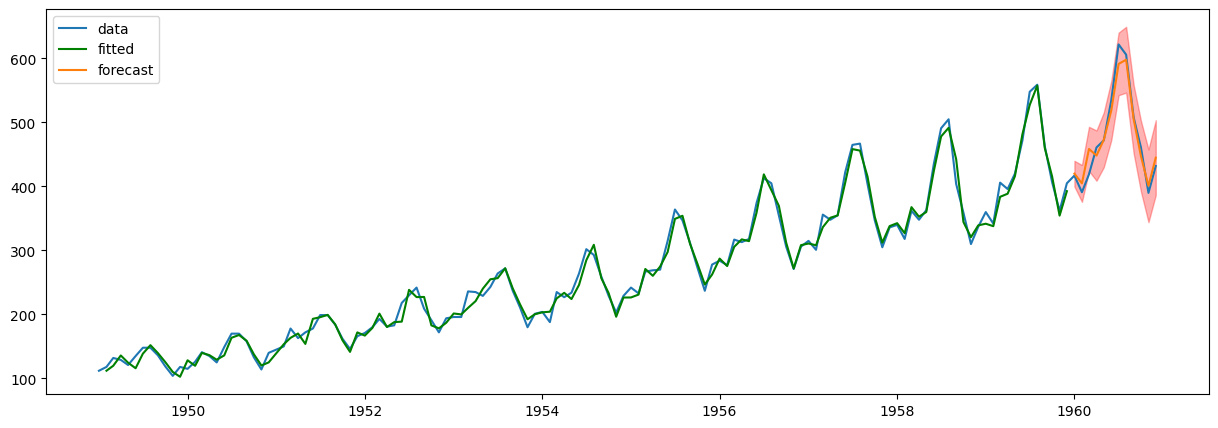

In [44]:
arima_1210 = ARIMA(train['Passengers'], order = (12, 1, 0))
arima_result_1210 = arima_1210.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, 'Passengers')

/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


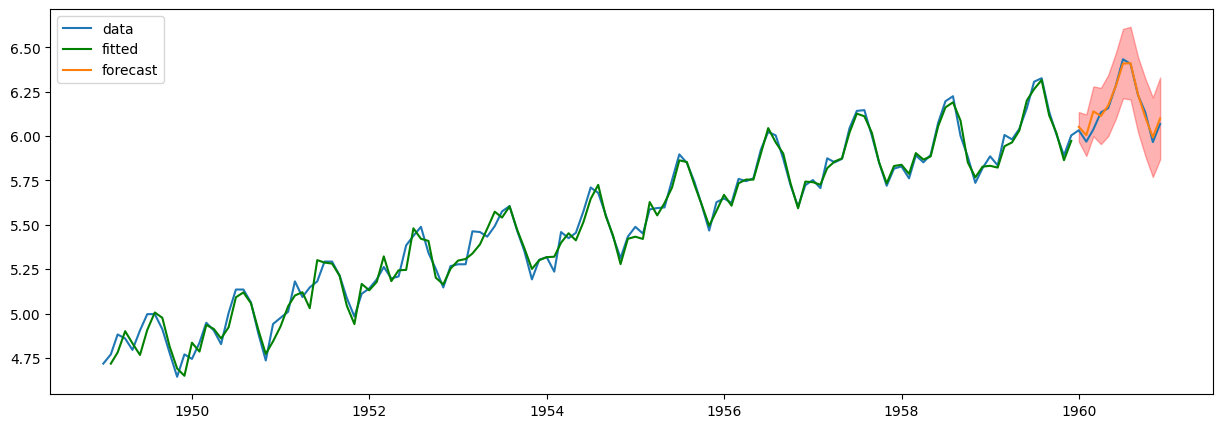

In [45]:
arima_log1210 = ARIMA(train['LogPassengers'], order = (12, 1, 0))
arima_result_log1210 = arima_log1210.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, 'LogPassengers')

In [46]:
def rmse(result, is_logged):
    forecast = result.forecast(Ntest)
    
    if is_logged:
        forecast = np.exp(forecast)
    
    t = test['Passengers']
    y = forecast
    
    return np.sqrt(np.mean((t - y)**2))

In [47]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.064587778443226
ARIMA(8,1,1) logged: 61.59921384282208
ARIMA(12,1,0): 17.492181169003157
ARIMA(12,1,0) logged: 16.114674944256304
